In [214]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.utils.extmath import softmax

In [215]:
df = datasets.load_iris()
X = df.data
y_t = df.target
y = df.target.reshape(-1,1)

In [216]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [217]:
X_train.shape

(120, 4)

In [218]:
class LogistMultinomial:
  import pandas as pd
  from sklearn.preprocessing import OneHotEncoder
  from sklearn.compose import ColumnTransformer
  import numpy as np
  def __init__(self,learning_reating,max_epochs):
    self.__learning_reating = learning_reating
    self.__max_epochs = max_epochs

  def __skf(self,X,theta) -> np.array:
    return X@theta

  def __softmax(self,x) -> np.array:
    x_n = x.to_numpy()
    e_x = np.exp(x_n - np.max(x_n, axis=1, keepdims=True))  # Usando keepdims corretamente
    return e_x / e_x.sum(axis=1, keepdims=True)

  def fit(self,X,y) -> None:
    #Vetor pesos com o Bias
    self.__theta = np.random.rand(X.shape[1] + 1,len(np.unique(y)))
    self.__X = pd.DataFrame(X)
    self.__X.insert(0,"Bias",np.ones((len(X),)))

    # One-hot encoding de y
    encoder = OneHotEncoder(sparse_output=False)
    self.__y = encoder.fit_transform(y.reshape(-1, 1))

    for i in range(self.__max_epochs):
      sk = self.__skf(self.__X, self.__theta)
      p = self.__softmax(sk)
      grad = (self.__X.T @ (p - self.__y))/len(self.__X)
      self.__theta -= self.__learning_reating*grad


  def weights(self) -> np.array:
    return self.__theta


  def predict(self,X,unique_instace=False) -> np.array:
    if not unique_instace:
      X_ = pd.DataFrame(X)
      X_.insert(0,"Bias",np.ones((len(X_),)))
      sk = self.__skf(X_,self.__theta)
      p = self.__softmax(sk)
      return np.argmax(p,axis=1)




In [219]:
learning_reating = 0.003
max_epochs = 1000
obj = LogistMultinomial(learning_reating,max_epochs)


obj.fit(X_train,y_train)

In [220]:
weights = obj.weights()

In [221]:
weights.shape

(5, 3)

In [222]:
y_pred = obj.predict(X_test)

Matriz de Confusão:


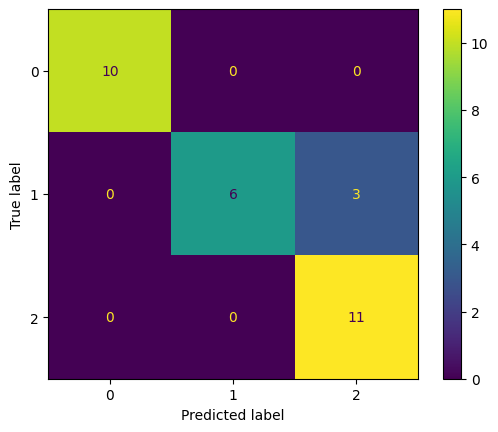

Acurácia:  0.9


In [223]:
cfM = confusion_matrix(y_test,y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cfM)

print("Matriz de Confusão:")
display.plot()
plt.show()


print("Acurácia: ",end=" ")
print(accuracy_score(y_pred,y_test))